дз2
1. Предобработать данные (пропуски, замена текста, дубликаты и т.д)
2. Использовать для классификации sklearn.ensemble.RandomForestClassifier
3. Подобрать лучшие гиперпараметры (n_estimators, criterion, max_depth)
4. Провести кроссвалидацию модели
5. Оценить метрики бинарной классификации (Precision, recall, f1)
6. Построить ROC-кривую для оценки качества классификатора



In [128]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve,auc, fbeta_score


from sklearn.datasets import make_classification

In [129]:
df = pd.read_csv('titanicdf.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [130]:
#проверка на пропуски? возраст есть пропуски
df.isna().sum() # количество пустых

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [131]:
df.shape # количество записей

(891, 12)

In [132]:
df.Survived.value_counts(normalize=True) #проверить на корретность полей

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [133]:
df.Pclass.value_counts(normalize=True) #проверить на корретность полей

3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64

In [134]:
df.Sex.value_counts(normalize=True) #проверить на корретность полей

male      0.647587
female    0.352413
Name: Sex, dtype: float64

In [135]:
df.SibSp.value_counts(normalize=True) #проверить на корретность полей

0    0.682379
1    0.234568
2    0.031425
4    0.020202
3    0.017957
8    0.007856
5    0.005612
Name: SibSp, dtype: float64

In [136]:
df.Parch.value_counts(normalize=True) #проверить на корретность полей

0    0.760943
1    0.132435
2    0.089787
5    0.005612
3    0.005612
4    0.004489
6    0.001122
Name: Parch, dtype: float64

In [137]:
df.Embarked.value_counts(normalize=True) #проверить на корретность полей

S    0.724409
C    0.188976
Q    0.086614
Name: Embarked, dtype: float64

In [138]:
#процентное соотношение на наличие пустых значений
for col in df.columns:
  print(col, round(df[col].isna().sum() / df.shape[0] *100,2))

PassengerId 0.0
Survived 0.0
Pclass 0.0
Name 0.0
Sex 0.0
Age 19.87
SibSp 0.0
Parch 0.0
Ticket 0.0
Fare 0.0
Cabin 77.1
Embarked 0.22


In [139]:
df.isna().sum()/df.shape[0] #  нас интересует возраст - процент от общего числа устых значений 19% 
# вообще рекомендуют если пропусков более 15% то их удаляют, но мы заменим на мреднюю медиану

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [140]:
#проверка дублей
df.duplicated().sum()

0

In [141]:
df[df.Embarked.isna()] #выводим данные с NaN по полю Embarked

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [142]:
df = df[df['Embarked'].notna()] #удаляем данные с NaN по полю Embarked

df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [143]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [144]:
# перезатрем все пустые значения возраста на средняя медиана
df.fillna(df.Age.median(),inplace = True) # 

C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [145]:
df.isna().sum() # проверим что стало

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [146]:
#сделаем корректировку по возрасту и переведем в 1 и 0
def check_age_for_molodezh(df):
    if df.Age <= 35:
        return 1
    else:
        return 0


In [147]:
df['Age_new'] = df.apply(check_age_for_molodezh,axis=1)
df

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_new
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,28,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,28,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,28,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,28,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,28,S,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


In [178]:
df_df=df[['Survived','Pclass','Age_new','Sex','Embarked']] # Survived - выжил или нет 0, 1 'Fare'
df_df

,Survived,Pclass,Age_new,Sex,Embarked
0,0,3,1,male,S
1,1,1,0,female,C
2,1,3,1,female,S
3,1,1,1,female,S
4,0,3,1,male,S
...,...,...,...,...,...
886,0,2,1,male,S
887,1,1,1,female,S
888,0,3,1,female,S
889,1,1,1,male,C


In [149]:
df_df.Pclass.value_counts(normalize=True) #проверить на корретность полей

3    0.552306
1    0.240720
2    0.206974
Name: Pclass, dtype: float64

In [179]:
df_df.Embarked.value_counts(normalize=True) #проверить на корретность полей Embarked

S    0.724409
C    0.188976
Q    0.086614
Name: Embarked, dtype: float64

In [180]:
#проведем таблицу к виду через 1 и 0  
new_df = pd.get_dummies(data=df_df, columns=['Pclass', 'Embarked'])
new_df

,Survived,Age_new,Sex,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,0,1,male,0,0,1,0,0,1
1,1,0,female,1,0,0,1,0,0
2,1,1,female,0,0,1,0,0,1
3,1,1,female,1,0,0,0,0,1
4,0,1,male,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
886,0,1,male,0,1,0,0,0,1
887,1,1,female,1,0,0,0,0,1
888,0,1,female,0,0,1,0,0,1
889,1,1,male,1,0,0,1,0,0


In [181]:
from sklearn.preprocessing import LabelEncoder


In [182]:
#все строковые поля с помошью метода меняем на цифру, в нашем случае 0 или 1
le = LabelEncoder()

In [183]:
new_df['Sex'] =  le.fit_transform(df['Sex'])
new_df

,Survived,Age_new,Sex,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,0,1,1,0,0,1,0,0,1
1,1,0,0,1,0,0,1,0,0
2,1,1,0,0,0,1,0,0,1
3,1,1,0,1,0,0,0,0,1
4,0,1,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
886,0,1,1,0,1,0,0,0,1
887,1,1,0,1,0,0,0,0,1
888,0,1,0,0,0,1,0,0,1
889,1,1,1,1,0,0,1,0,0


In [184]:
X_train, X_test, y_train, y_test = train_test_split(new_df.drop('Survived',axis=1), new_df['Survived'], test_size=0.25, random_state=42)

In [156]:
X_train

,Age_new,Fare,Sex,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
376,1,7.2500,0,0,0,1,0,0,1
458,0,10.5000,0,0,1,0,0,0,1
732,1,0.0000,1,0,1,0,0,0,1
507,1,26.5500,1,1,0,0,0,0,1
830,1,14.4542,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...
107,1,7.7750,1,0,0,1,0,0,1
271,1,0.0000,1,0,0,1,0,0,1
862,0,25.9292,0,1,0,0,0,0,1
436,1,34.3750,0,0,0,1,0,0,1


используем алгоритм случайного леса
Алгоритм random forest объединяет несколько алгоритмов одного и того же типа , т. е. несколько решений деревьев ,
в результате чего получается лес деревьев , отсюда и название “Случайный лес”. 
Алгоритм случайного леса может быть использован как для регрессионных, так и для классификационных задач.

In [157]:
from sklearn.ensemble import RandomForestClassifier

In [185]:
reg=RandomForestClassifier(n_estimators=100,criterion='gini', max_depth=None)
#n_estimatorsint, по умолчанию = 100? Количество деревьев в лесу 
# criterion функция измерения качества раскола? по умолчанию = «джини» criterion{“gini”, “entropy”},
# max_depth  по умолчанию = None? Максимальная глубина дерева. max_depth int, по умолчанию=Нет
#Максимальная глубина дерева. Если нет, то узлы расширяются до тех пор, пока все листья не станут чистыми 
#или пока все листья не будут содержать меньше образцов min_samples_split.

reg.fit(X_train, y_train)




RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
class sklearn.ensemble.RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, 
                                              min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, 
                                              min_impurity_split=None, bootstrap=True, oob_score=False, 
                                              n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)[source]

In [186]:
pred = reg.predict(X_test) # прогнозируем
pred

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1], dtype=int64)

In [187]:
# на выходе  % - вывод- модель точна|нет при таких данных
import sklearn
sklearn.metrics.accuracy_score(y_test, pred)

0.8161434977578476

In [86]:
# показывает процент на выходе  всех полей
reg.feature_importances_

array([2.36603484e-02, 4.91353520e-01, 3.29617153e-01, 2.37760611e-02,
       1.96973904e-02, 7.28417663e-02, 1.76437629e-04, 1.38273114e-02,
       9.07863216e-03, 1.59713797e-02])

In [162]:
# Подобрать лучшие гиперпараметры (n_estimators, criterion, max_depth)
N=[10,30,100]
krit=['gini','entropy']
test_deep = []
for deep in range (1,31):
    for leaf in  N:
        for kr in  krit:
        # print("--------", deep, "--------", leaf)
            clf = RandomForestClassifier(max_depth=deep, n_estimators=leaf, criterion=kr)
            model = clf.fit(X_train, y_train)
            pred = model.predict(X_test)
            test_deep.append([deep,leaf,kr,f1_score(y_test,pred),recall_score(y_test,pred)])

In [163]:
#
test_deep = pd.DataFrame(test_deep)
test_deep.columns = ['max_depth','n_estimators', 'criterion','f1_score','recall_score']
# test_deep.sort_values(by='f1_score',ascending=False).head()

In [164]:
test_deep.sort_values(by='f1_score',ascending=False).head(10)

,max_depth,n_estimators,criterion,f1_score,recall_score
102,18,10,gini,0.746835,0.719512
108,19,10,gini,0.746835,0.719512
73,13,10,entropy,0.743590,0.707317
72,13,10,gini,0.742515,0.756098
78,14,10,gini,0.742138,0.719512
157,27,10,entropy,0.740741,0.731707
109,19,10,entropy,0.740260,0.695122
23,4,100,entropy,0.739726,0.658537
115,20,10,entropy,0.738854,0.707317
67,12,10,entropy,0.737500,0.719512


In [165]:
# ИЛИ другой метод
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier



In [188]:
#зададим параметры нашим значениям,  
tree_para = {'criterion':['gini','entropy'],
             'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150],
             'n_estimators':[10,30,100]}
tree_para

{'criterion': ['gini', 'entropy'],
 'max_depth': [4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  15,
  20,
  30,
  40,
  50,
  70,
  90,
  120,
  150],
 'n_estimators': [10, 30, 100]}

In [189]:
#расчет различных комбинаций, по нашим параметрам
clf_gs = GridSearchCV(RandomForestClassifier(), tree_para, cv=10, scoring = 'recall')
clf_gs.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [190]:
#лучшие гиперпараметры (n_estimators, criterion, max_depth)
clf_gs.best_params_

{'criterion': 'entropy', 'max_depth': 4, 'n_estimators': 10}

In [191]:
#кроссвалидация модели разбиваем базу методом ShuffleSplit, нарезаем базу
cv = ShuffleSplit(n_splits=10, test_size=0.33, random_state=0)
scores = cross_val_score(reg, X_train, y_train, cv=cv, scoring='recall')

In [192]:
#среднее значение - в данном случаеи тест разбили 10 раз 
scores.mean()

0.567130928709979

In [171]:
scores

array([0.69318182, 0.66326531, 0.71428571, 0.67058824, 0.65116279,
       0.7       , 0.69387755, 0.74725275, 0.62162162, 0.62337662])

In [172]:
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [193]:
# метрики бинарной классификации (Precision, recall, f1
print('Accuracy:',accuracy_score(y_test,pred))
print('Precision:',precision_score(y_test,pred))
print('Recall:',recall_score(y_test,pred))   # процент выживших 80% т.е учли многое, модель хорошая
print('F1:',f1_score(y_test,pred))

Accuracy: 0.8161434977578476
Precision: 0.8360655737704918
Recall: 0.6219512195121951
F1: 0.7132867132867133


In [174]:
#ROC-AUC  ROC-кривую для оценки качества классификатора, значения вероятности 1

pred_reg = reg.predict_proba(X_test)[:,1]
pred_reg

array([0.1733575 , 1.        , 0.8135    , 0.24108624, 0.99      ,
       0.        , 0.24108624, 0.        , 0.98      , 1.        ,
       0.32444949, 0.62008333, 0.        , 0.31      , 0.29254987,
       0.08666667, 0.19083333, 0.19173243, 0.695     , 0.        ,
       0.09      , 1.        , 0.02197222, 0.348     , 0.13819653,
       0.04571429, 0.39815115, 0.98066667, 0.        , 0.12455027,
       0.06      , 0.65834663, 0.13819653, 0.68      , 0.        ,
       0.62      , 0.99      , 0.12      , 0.25542857, 0.13819653,
       0.        , 0.42242857, 0.24108624, 0.        , 0.72109524,
       0.03      , 1.        , 0.        , 0.24108624, 1.        ,
       1.        , 0.97681818, 0.36511508, 0.        , 0.89547619,
       1.        , 0.37233333, 0.61488095, 0.00761905, 0.12455027,
       0.42242857, 0.64675   , 1.        , 0.28904987, 0.9775    ,
       0.24108624, 0.18462698, 0.99      , 1.        , 1.        ,
       0.24108624, 1.        , 0.69      , 0.        , 0.04666

In [194]:
# качество полученного результата   если ROC AUC >0.5 то модель хорошая!
fpr, tpr, treshold = roc_curve(y_test, pred_reg)
tree_auc = roc_auc_score(y_test, pred_proba)
print('DecisionTreeClassifier: ROC AUC=%.3f' % (tree_auc))

DecisionTreeClassifier: ROC AUC=0.513


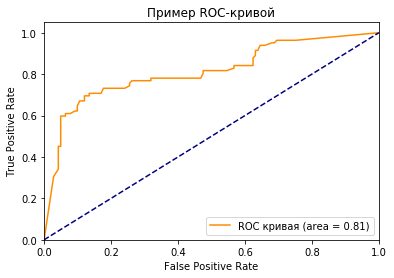

In [195]:
roc_auc = auc(fpr, tpr)
# строим график, кривая находится над прямой, это хорошо! чем более выпуклая, тем качественнее имодель и расстояние под прямой  это площадь roc_auc, в идеале площадь равна 1 
plt.plot(fpr, tpr,  color='darkorange',
         label='ROC кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Пример ROC-кривой')
plt.legend(loc="lower right")
plt.show()

In [177]:
treshold  #точки прямой

array([2.00000000e+00, 1.00000000e+00, 9.90000000e-01, 9.80666667e-01,
       9.80000000e-01, 9.77500000e-01, 9.63352941e-01, 9.46666667e-01,
       9.40000000e-01, 9.17382701e-01, 8.95476190e-01, 7.90000000e-01,
       7.38414802e-01, 7.21095238e-01, 6.95000000e-01, 6.90000000e-01,
       6.80000000e-01, 6.62989492e-01, 6.58346635e-01, 6.30000000e-01,
       6.20083333e-01, 6.14880952e-01, 5.57309524e-01, 4.55833333e-01,
       4.49000000e-01, 4.22428571e-01, 4.20000000e-01, 4.04683095e-01,
       3.63333333e-01, 3.60000000e-01, 3.48000000e-01, 3.40309524e-01,
       3.24449495e-01, 2.92549867e-01, 2.70000000e-01, 2.55428571e-01,
       2.52220058e-01, 2.50833333e-01, 2.41086241e-01, 2.10000000e-01,
       1.91732431e-01, 1.90833333e-01, 1.84626984e-01, 1.80919742e-01,
       1.73357504e-01, 1.68544372e-01, 1.60572983e-01, 1.46952381e-01,
       1.38196531e-01, 1.29397006e-01, 1.24550270e-01, 1.21130411e-01,
       1.20000000e-01, 1.17230339e-01, 8.66666667e-02, 6.00000000e-02,
      